In [10]:
import pandas as pd
import numpy as np
import os

In [6]:
# Imports
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
import matplotlib.pyplot as plt

adwin = ADWIN()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000
for i in range(999, 2000):
     data_stream[i] = np.random.randint(4, high=8)
# Adding stream elements to ADWIN and verifying if drift occurred
for i in range(2000):
     adwin.add_element(data_stream[i])
     if adwin.detected_change():
         print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

Change detected in data: 5 - at index: 1023
Change detected in data: 4 - at index: 1055
Change detected in data: 4 - at index: 1087


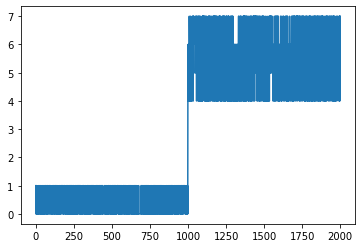

In [3]:
plt.plot(data_stream)

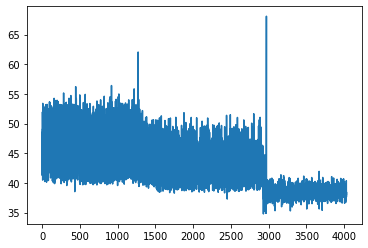

In [11]:
## Datasets w/ concept drift

folder = '../datasets/NAB/data/'
filename = 'realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv'

df_ = pd.read_csv(os.path.join(folder, filename))

plt.plot(df_['value'].values)

Change detected in data: 46.056 - at index: 1599
Change detected in data: 47.184 - at index: 1663
Change detected in data: 44.272 - at index: 1919
Change detected in data: 37.904 - at index: 3039
Change detected in data: 38.076 - at index: 3103
Change detected in data: 38.54 - at index: 3135
Change detected in data: 37.562 - at index: 3167
Change detected in data: 36.824 - at index: 3199
Change detected in data: 37.582 - at index: 3263
Change detected in data: 39.062 - at index: 3807


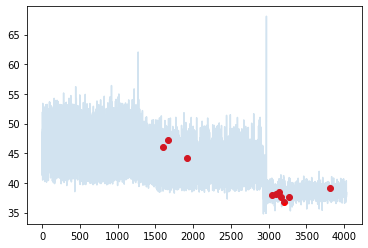

In [35]:
adwin2 = ADWIN(delta=0.001)

# Adding stream elements to ADWIN and verifying if drift occurred
anomalies_x = list()
anomalies_y = list()

for i in range(4000):
    adwin2.add_element(df_['value'].values[i])
    if adwin2.detected_change():
        print('Change detected in data: ' + str(df_['value'].values[i]) + ' - at index: ' + str(i))
        anomalies_x.append(i)
        anomalies_y.append(df_['value'].values[i])

plt.scatter(anomalies_x, anomalies_y, marker='o', c='r')
plt.plot(df_['value'].values,alpha=0.2)

In [27]:
# Imports
from skmultiflow.drift_detection import DDM
ddm = DDM(min_num_instances=10,out_control_level=1.0)


# Adding stream elements to DDM and verifying if drift occurred
for i in range(4000):
     ddm.add_element(df_['value'].values[i])
     if ddm.detected_warning_zone():
         print('Warning zone has been detected in data: ' + str(df_['value'].values[i]) + ' - of index: ' + str(i))
     if ddm.detected_change():
         print('Change has been detected in data: ' + str(df_['value'].values[i]) + ' - of index: ' + str(i))